## Final Project Submission

Please fill out:
* Student name: Wambui Thuku
* Student pace: part time 
* Scheduled project review date/time: 16/04/2023
* Instructor name: Noah Kandie
* Blog post URL:


![Movies](Movies.jpg)

# MICROSOFT'S MOVIE ANALYLIS


Author: Wambui Thuku

# Introduction

In this project, I will be exploring what types of films are currently doing the best at the box office. I will then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Business Problem

I will be exploring what types of films are currently doing the best at the box office. I will then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create. I formulated these three questions to help analyse the data and come up with the required findings.
1. Which movie genres have the highest ratings?
2. Does production budget affect the returns of the movie?
3. What time of year is best to release movies?

## Data

I will be using data from the following sources;
* Rotten Tomatoes movie info tsv
* The Movie DB  movies csv
* The Numbers movie budgets csv

## Data Analysis

In [1]:
# importing the packages I will be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import sqlite3

%matplotlib inline

In the cells below, I will load the data and inspect the attributes of the dataframes.

 ## Rotten tomatoes

In [24]:
#read the box office mojo csv
rt_df = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter='\t', compression='gzip', encoding='unicode_escape', index_col=0)
rt_df.head(10)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN


In [25]:
#get the dimension of the data
rt_df.shape

(1560, 11)

In [26]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


***Cleaning the data***

In [27]:
#drop unwanted columns
rt_df = rt_df.drop(["synopsis", "rating", "director", "writer", "runtime", "studio", "currency", "box_office"], axis=1)
rt_df

,genre,theater_date,dvd_date
id,,,
1,Action and Adventure|Classics|Drama,"Oct 9, 1971","Sep 25, 2001"
3,Drama|Science Fiction and Fantasy,"Aug 17, 2012","Jan 1, 2013"
5,Drama|Musical and Performing Arts,"Sep 13, 1996","Apr 18, 2000"
6,Drama|Mystery and Suspense,"Dec 9, 1994","Aug 27, 1997"
7,Drama|Romance,NaN,NaN
...,...,...,...
1996,Action and Adventure|Horror|Mystery and Suspense,"Aug 18, 2006","Jan 2, 2007"
1997,Comedy|Science Fiction and Fantasy,"Jul 23, 1993","Apr 17, 2001"
1998,Classics|Comedy|Drama|Musical and Performing Arts,"Jan 1, 1962","May 11, 2004"


In [28]:
#drop rows with missing values
rt_df = rt_df.dropna(subset=["genre"])
rt_df

,genre,theater_date,dvd_date
id,,,
1,Action and Adventure|Classics|Drama,"Oct 9, 1971","Sep 25, 2001"
3,Drama|Science Fiction and Fantasy,"Aug 17, 2012","Jan 1, 2013"
5,Drama|Musical and Performing Arts,"Sep 13, 1996","Apr 18, 2000"
6,Drama|Mystery and Suspense,"Dec 9, 1994","Aug 27, 1997"
7,Drama|Romance,NaN,NaN
...,...,...,...
1996,Action and Adventure|Horror|Mystery and Suspense,"Aug 18, 2006","Jan 2, 2007"
1997,Comedy|Science Fiction and Fantasy,"Jul 23, 1993","Apr 17, 2001"
1998,Classics|Comedy|Drama|Musical and Performing Arts,"Jan 1, 1962","May 11, 2004"


## The Movie DB

In [45]:
#read the csv
tmdb_df = pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col=0)
tmdb_df.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [46]:
#get the dimension of the data
tmdb_df.shape

(26517, 9)

In [47]:
#get the type of data
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [48]:
tmdb_df = tmdb_df.drop(["id", "original_language", "title"], axis=1)
tmdb_df

,genre_ids,original_title,popularity,release_date,vote_average,vote_count
0,"[12, 14, 10751]",Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
1,"[14, 12, 16, 10751]",How to Train Your Dragon,28.734,2010-03-26,7.7,7610
2,"[12, 28, 878]",Iron Man 2,28.515,2010-05-07,6.8,12368
3,"[16, 35, 10751]",Toy Story,28.005,1995-11-22,7.9,10174
4,"[28, 878, 12]",Inception,27.920,2010-07-16,8.3,22186
...,...,...,...,...,...,...
26512,"[27, 18]",Laboratory Conditions,0.600,2018-10-13,0.0,1
26513,"[18, 53]",_EXHIBIT_84xxx_,0.600,2018-05-01,0.0,1
26514,"[14, 28, 12]",The Last One,0.600,2018-10-01,0.0,1
26515,"[10751, 12, 28]",Trailer Made,0.600,2018-06-22,0.0,1


In [49]:
import ast

In [50]:
# change the genre_ids to genres
# define a dictionary that maps genre IDs to genre names
genre_dict = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

# define a function that replaces genre_ids with genre names
def replace_genre_ids(genre_ids_str):
    genre_ids_list = ast.literal_eval(genre_ids_str)
    genre_names_list = [genre_dict.get(genre_id, 'Unknown') for genre_id in genre_ids_list]
    return genre_names_list

# use the apply() method to apply the replace_genre_ids function to the genre_ids column
tmdb_df['genre'] = tmdb_df['genre_ids'].apply(replace_genre_ids)
tmdb_df = tmdb_df.drop(columns=['genre_ids'])
tmdb_df


,original_title,popularity,release_date,vote_average,vote_count,genre
0,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788,"[Adventure, Fantasy, Family]"
1,How to Train Your Dragon,28.734,2010-03-26,7.7,7610,"[Fantasy, Adventure, Animation, Family]"
2,Iron Man 2,28.515,2010-05-07,6.8,12368,"[Adventure, Action, Science Fiction]"
3,Toy Story,28.005,1995-11-22,7.9,10174,"[Animation, Comedy, Family]"
4,Inception,27.920,2010-07-16,8.3,22186,"[Action, Science Fiction, Adventure]"
...,...,...,...,...,...,...
26512,Laboratory Conditions,0.600,2018-10-13,0.0,1,"[Horror, Drama]"
26513,_EXHIBIT_84xxx_,0.600,2018-05-01,0.0,1,"[Drama, Thriller]"
26514,The Last One,0.600,2018-10-01,0.0,1,"[Fantasy, Action, Adventure]"
26515,Trailer Made,0.600,2018-06-22,0.0,1,"[Family, Adventure, Action]"


## The Numbers

In [51]:
#read the csv
tn_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", index_col=0)
tn_df.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


In [52]:
#get the dimension of the data
tn_df.shape

(5782, 5)

In [53]:
#get the type of data
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


## 1. Which movie genres have the highest grossing titles?

Joining the dataframes in order to analyse the data.

In [59]:
# use explode to convert the genre lists into individual genres
rt_df_exploded = rt_df.explode("genre")
tmdb_df_exploded = tmdb_df.explode("genre")
# merge the rt_df with the tmdb_df
rtmdb_df = pd.merge(rt_df_exploded, tmdb_df_exploded, on="genre", how="inner")
rtmdb_df

,genre,theater_date,dvd_date,original_title,popularity,release_date,vote_average,vote_count
0,Comedy,"Jan 11, 2002","Jun 18, 2002",Toy Story,28.005,1995-11-22,7.9,10174
1,Comedy,"Jan 11, 2002","Jun 18, 2002",Toy Story 3,24.445,2010-06-17,7.7,8340
2,Comedy,"Jan 11, 2002","Jun 18, 2002",Despicable Me,23.673,2010-07-09,7.2,10057
3,Comedy,"Jan 11, 2002","Jun 18, 2002",Megamind,22.855,2010-11-04,6.8,3635
4,Comedy,"Jan 11, 2002","Jun 18, 2002",Toy Story 2,22.698,1999-11-24,7.5,7553
...,...,...,...,...,...,...,...,...
2035351,Western,NaN,NaN,A Fistful of Lead,1.917,2018-12-04,7.5,2
2035352,Western,NaN,NaN,A Reckoning,1.842,2018-08-07,5.0,1
2035353,Western,NaN,NaN,The Divide,1.552,2018-01-01,2.0,1
2035354,Western,NaN,NaN,Tryouts,1.546,2018-02-09,7.0,1


In [60]:
rtmdb_df["genre"].value_counts()

Drama          1253753
Comedy          621720
Horror          114173
Documentary      44685
Western           1025
Name: genre, dtype: int64

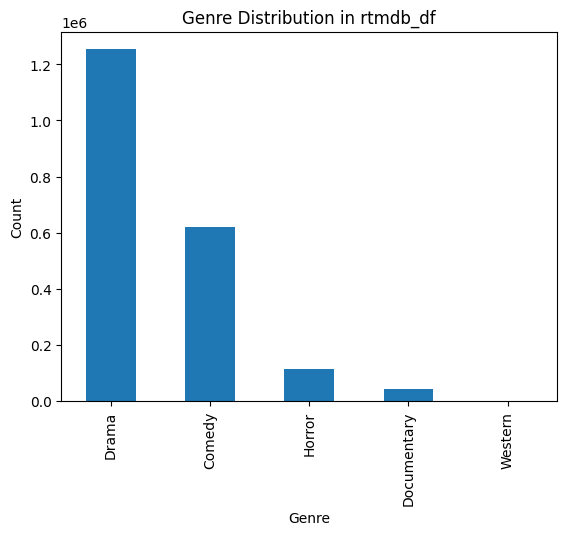

In [61]:
# plot a bar chart of the value counts of each genre
rtmdb_df["genre"].value_counts().plot.bar()

# set the plot title and axis labels
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")

# display the plot
plt.show()